<a href="https://colab.research.google.com/github/xihajun/Keep-learning/blob/master/code/random_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("./drive/My Drive/images/")


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (122880000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


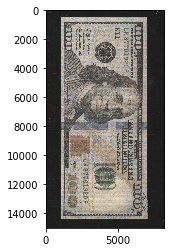

In [3]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('F_100USD RGB D-26864.bmp'))

In [105]:
from PIL import ImageTk, Image


img = Image.open('F_100USD RGB D-26864.bmp')
box = (img.size[0]/2-img.size[0]/3, img.size[1]/2-img.size[1]/3, img.size[0]/2+img.size[0]/3, img.size[1]/2+img.size[1]/3)
region = img.crop(box)
region.save('saved_F.bmp')

img = Image.open('G_100USD RGB B2 1.bmp')
box = (img.size[0]/2-img.size[0]/3, img.size[1]/2-img.size[1]/3, img.size[0]/2+img.size[0]/4, img.size[1]/2+img.size[1]/3)
region = img.crop(box)
region.save('saved_G.bmp')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (122880000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


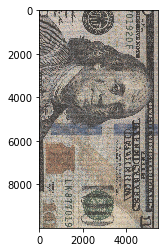

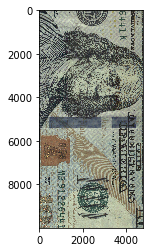

In [79]:
plt.imshow(plt.imread('saved_F.bmp'))
plt.figure()
plt.imshow(plt.imread('saved_G.bmp'))

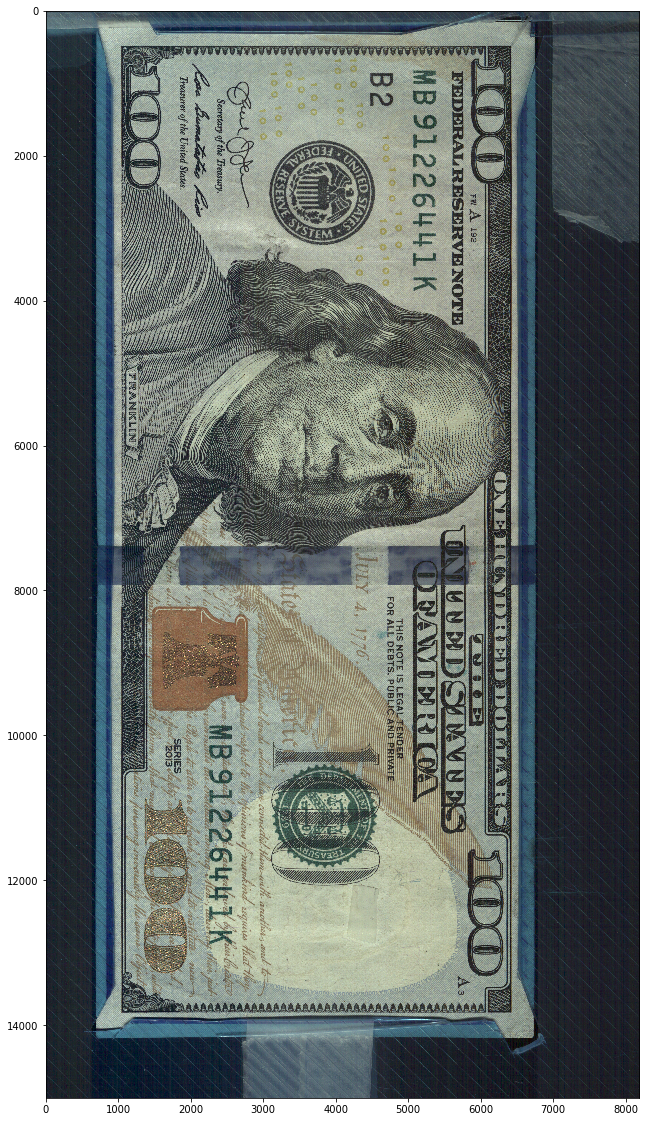

In [40]:
plt.figure(figsize = (200,20))

plt.imshow(img)


In [91]:
import random
import string
random.randint(0,1)
''.join(random.sample(string.ascii_letters + string.digits, 8))

'X7nt91uO'

In [0]:
def sample_generation(filename, num, output_path):
  '''
  parameters: filename, num, output_path
  filename: original image
  num: number of sampling
  output_path
  '''
  samples = []
  # read the image
  img = Image.open(filename)
  max_l = img.size[0]-201
  max_w = img.size[1]-201
  # select subimages
  import random
  for i in range(0,num):
    x_0 = random.randint(0,max_l)
    y_0 = random.randint(0,max_w)
    box = (x_0,y_0,x_0+201,y_0+201)
    region = img.crop(box)
    temp_name = ''.join(random.sample(string.ascii_letters + string.digits, 8))
    region.save('./'+output_path+str(i)+'.bmp')
  #   samples.append(region)
  # return samples


In [0]:
sample_generation('saved_G.bmp',1000,'good/')

In [0]:
sample_generation('saved_F.bmp',1000,'bad/')

In [0]:
import numpy as np
import pandas as pd
import os

goodlist = []
for dirname, _, filenames in os.walk('./good/'):
    for filename in filenames:
        goodlist.append(os.path.join(dirname,filename))

badlist = []
for dirname, _, filenames in os.walk('./bad/'):
    for filename in filenames:
        badlist.append(os.path.join(dirname,filename))

In [0]:
def return_input_for_deep_learning(filename_list):
    images = []
    label = []
    for filename in filename_list:
        try:
          original = plt.imread(filename)
          temp = np.array(original.reshape(201,201,3), dtype=np.float64) / 255
          if filename_list[0].split('/')[1] == 'good':
            label.append(1)
          else:
            label.append(0)
          images.append(temp)
        except:
          print(filename)
    return label, images

In [0]:
goodlist.extend(badlist)

In [0]:
label, images = return_input_for_deep_learning(goodlist)

In [9]:
len(label)

2000

In [0]:
import pickle
with open('./auto_model.pl','rb') as f:
  auto_model = pickle.load(f)

from diynn import *
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, UpSampling2D, Cropping2D, Input, Flatten, Dense, BatchNormalization

filename_list = goodlist
input_shape_img = (201, 201, 3)
img_input = Input(shape=input_shape_img)

# model build
CNN_output = CNN(img_input, trainable=True)
final_model = Model(inputs=img_input,outputs=CNN_output)

In [0]:
auto_img = auto_model.predict(np.array(images))
im = [auto_img[i]-images[i] for i in range(len(images))]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# training and testing set splitting
x_train, x_test, y_train, y_test= train_test_split(np.array(im),label,test_size=0.2, random_state = 0)

# train the cnn model
final_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
final_model.fit(x_train,y_train,epochs=5)

In [15]:
final_model.evaluate(x_test,y_test)

400/400 [==============================] - 3s 7ms/step


[6.138241792541521e-06, 1.0]

In [0]:

filelist = []
for dirname, _, filenames in os.walk('./test/'):
    for filename in filenames:
        filelist.append(os.path.join(dirname,filename))

In [0]:
label, images = return_input_for_deep_learning(filelist)

auto_img = auto_model.predict(np.array(images))
im = [auto_img[i]-images[i] for i in range(len(images))]
x_train, x_test, y_train, y_test= train_test_split(np.array(im),label,test_size=0.01, random_state = 0)


In [30]:
final_model.evaluate(x_train,y_train)

12/12 [==============================] - 0s 8ms/step


[15.150779724121094, 0.0]

In [0]:
!rm -rf test/
!mkdir test

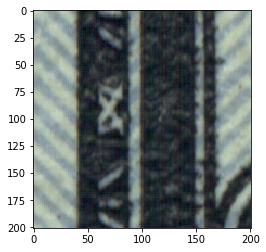

In [36]:
box = (1000, 1000, 1201, 1201)
region = img.crop(box)
plt.imshow(region)


In [51]:
import cv2
import numpy as np
im = plt.imread('F_100USD RGB D-26864.bmp')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (122880000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [9]:
im.shape

(15000, 8192, 3)

In [14]:
15000* 8192

122880000